In [7]:
from tensorflow.keras.datasets import boston_housing
import numpy as np

In [8]:
(train_data, train_targets), (test_data, test_targets) = (boston_housing.load_data())

In [9]:
train_data.shape

(404, 13)

In [10]:
test_data.shape

(102, 13)

In [12]:
np.mean(train_targets)

22.395049504950492

In [18]:
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data -= mean
train_data /= std
test_data -= mean
test_data /= std

In [118]:
from tensorflow import keras
from tensorflow.keras import layers

def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

In [83]:
k=4
num_epochs=500
num_val_samples=len(train_data) // k
all_mae_histories = []
all_mse_histories = []

for i in range(k):
    #print(f"Processing fold #{i}")
    val_data = train_data[i*num_val_samples : (i+1)*num_val_samples]
    #print(val_data.shape)
    val_targets = train_targets[i*num_val_samples : (i+1)*num_val_samples]
    #print(val_targets.shape)
    partial_train_data = np.concatenate(
        [train_data[:i*num_val_samples],
        train_data[(i+1)*num_val_samples:]],
        axis=0
    )
    #print(partial_train_data.shape)
    partial_train_targets = np.concatenate(
        [train_targets[:i*num_val_samples],
        train_targets[(i+1)*num_val_samples:]],
        axis=0
    )
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets, validation_data=(val_data, val_targets), epochs=num_epochs, batch_size=16, verbose=0)
    #val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    #all_scores.append(val_mae)
    #print(history.history)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)
    mse_history = history.history["val_loss"]
    all_mse_histories.append(mse_history)

In [84]:
average_mae_history= [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)
]
average_mse_history= [
    np.mean([x[i] for x in all_mse_histories]) for i in range(num_epochs)
]

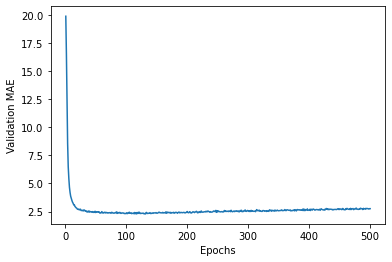

In [85]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

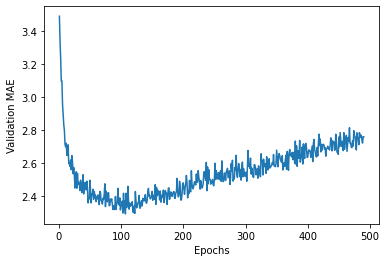

In [86]:
truncated_mae_history=average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

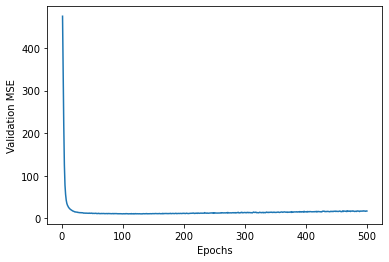

In [87]:
plt.plot(range(1, len(average_mse_history) + 1), average_mse_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MSE")
plt.show()

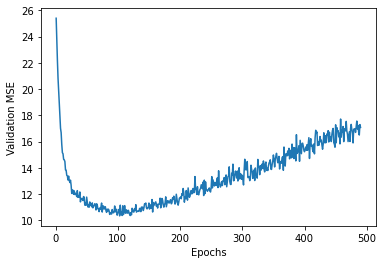

In [88]:
truncated_mse_history=average_mse_history[10:]
plt.plot(range(1, len(truncated_mse_history) + 1), truncated_mse_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MSE")
plt.show()

In [123]:
model=build_model()
model.fit(train_data, train_targets, epochs=125, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 2ms/step - loss: 14.0568 - mae: 2.4583


In [124]:
test_mae_score

2.458272695541382

In [125]:
predictions = model.predict(test_data)

In [126]:
predictions[0]

array([8.053934], dtype=float32)